<h1><center>CSCI 4146/6409 - Process of Data Science (Summer 2024)</h1></center>
<h1><center>Assignment No 1</h1></center>

<b>Himanshi Verma</b>  
<b>B00976966</b>  
 

 

### 1. Task 1<a id='top'></a>

#### Business Understanding

####  a). Business Problem Statement

**Problem:** Because there are many variables that influence car prices, it can be difficult to precisely determine the Manufacturer's Suggested Retail Price (MSRP) in the automotive market. Setting fair selling prices, negotiating sales, and recognizing market trends become challenging due to this imprecise pricing estimation. As a result, buyers, sellers, and auto dealers often rely on uncertain judgment or outdated data, leading to ineffective market transactions and potential financial losses.

**Solution:** To solve this problem, we plan to create an advanced predictive model using machine learning techniques. This model will examine various car features, including make, model, year, engine specifications, and physical attributes, to accurately estimate the MSRP. By using historical data and advanced algorithms, the model will offer a more objective and data-driven approach to price estimation.

**Impact:** Implementing this predictive model will help car dealers, buyers, and sellers make better decisions. It will simplify the process of setting and negotiating prices, saving time and effort that is now spent on personal judgment. Additionally, the insights from the model will help understand market trends and behaviors, leading to more strategic and profitable car sales.

#### b). Data Science Solutions

**Solution 1:** Analyzing and predicting car prices primarily based on car characteristics (e.g. engine specifications, physical attributes).

**Feasibility:**

- **Required Data:** The dataset is rich in car characteristics, making this approach highly feasible.
- **Business Capacity:** Moderate. 
This approach requires capabilities in handling and analyzing structured data, feature engineering, and basic to moderate machine learning techniques.

**Solution 2:** Leveraging additional external data (e.g., economic indicators, market trends) to predict car prices.

**Feasibility:**

- **Required Data:** The dataset contains basic car characteristics. Additional data on market trends and economic indicators would be ideal.
- **Business Capacity:** Moderate to high. 
This approach requires not only data analysis skills but also the ability to integrate and interpret external data sources.

**Solution 3:** An all-rounded approach that combines car characteristics, external market data, and consumer preference data to predict car prices.

**Feasibility:**

- **Required Data:** Requires a comprehensive set of data, including external market and economic indicators. Some of these aspects are not covered in the current dataset.
- **Business Capacity:** High. 
This solution demands advanced data analysis skills, expertise in economic modeling, and possibly advanced machine learning or statistical modeling techniques.

####  Final Solution Selection:

Considering the nature of our dataset and the scope of our business problem, we recommend **Solution 1: Car-Centric Analysis** because of the following reasons:

1. Our dataset is rich in car characteristics, making this approach highly feasible and directly aligned with the data we have.
2. Focusing on car characteristics allows for a more straightforward and efficient modeling process, which is beneficial given our current (business) capacity.
3. Car features are significant determinants of MSRP and can provide valuable insights for car pricing, catering well to our objective of informing pricing and market understanding.

#### c). Prediction Subject and Domain Concepts

**Prediction Subject:** The prediction subject for this problem is the “MSRP (Manufacturer's Suggested Retail Price)” denoted by the column name “MSRP”.

**Domain Concepts and Sub-Concepts:**

1. **Basic Information**
   - Make: The brand of the vehicle.
   - Model: The specific model of the vehicle.
   - Year: The year of manufacture.
2. **Engine Specifications**
   - Engine Fuel Type: Type of fuel used by the engine (e.g., gasoline, diesel, electric).
   - Engine HP: Horsepower of the engine.
   - Engine Cylinders: Number of cylinders in the engine.
3. **Transmission**
   - Transmission Type: Type of transmission (e.g., automatic, manual).
4. **Drivetrain**
   - Driven Wheels: Type of driven wheels (e.g., FWD, RWD, AWD).
5. **Physical Attributes**
   - Number of Doors: Number of doors in the vehicle.
   - Vehicle Size: Size category of the vehicle (e.g., compact, midsize, full-size).
   - Vehicle Style: Style or body type of the vehicle (e.g., sedan, SUV, coupe).
6. **Market Information**
   - Market Category: Market category of the vehicle (e.g., luxury, sport, economy).
7. **Fuel Efficiency**
   - City MPG: Miles per gallon in city driving.
   - Highway MPG: Miles per gallon on highway driving.
8. **Pricing**
   - MSRP: Manufacturer's suggested retail price.


**Hierarchical Graph -** 

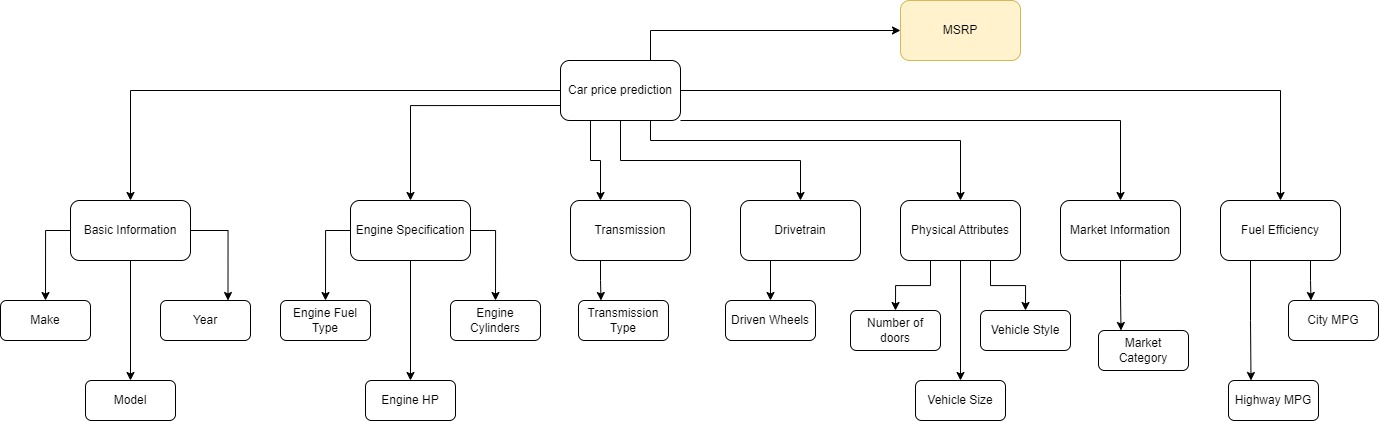

#### d). Creating ABT 

In [52]:
import opendatasets as od 
import pandas as pd
import warnings
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display, HTML

In [53]:
#download dataset from kaggle
#od.download("https://www.kaggle.com/datasets/CooperUnion/cardataset") 

In [54]:
# Set options to avoid truncation when displaying a dataframe
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
# Set floating point numbers to be displayed with 2 decimal places
pd.set_option('display.float_format', '{:.2f}'.format)
# Loading the dataset into a dataframe
# NOTE: pandas can download data automatically
DATA_URL = "data.csv"
car_df = pd.read_csv(DATA_URL)

#all features -
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [55]:
#converting data types
#car_df = car_df.convert_dtypes()
#car_df.dtypes

In [56]:
# List of key features for predicting MSRP
key_features = ['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Driven_Wheels', 'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style', 'city mpg', 'highway MPG', 'MSRP']
# Create a DataFrame for key features
key_features_df = car_df[key_features]
categorical_features = key_features_df.select_dtypes(exclude="number").columns

numerical_features = key_features_df.select_dtypes("number").columns

In [57]:

# Create the Analytical Base Table (ABT) for key features
abt_data = {
    'Feature Name': [
        'Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP', 'Engine Cylinders',
        'Transmission Type', 'Driven_Wheels', 'Number of Doors', 'Market Category',
        'Vehicle Size', 'Vehicle Style', 'city mpg', 'highway MPG', 'MSRP'
    ],
    'Domain Concept': [
        'Basic Information', 'Basic Information', 'Basic Information', 'Engine Specifications',
        'Engine Specifications', 'Engine Specifications', 'Transmission', 'Drivetrain',
        'Physical Attributes', 'Market Information', 'Physical Attributes', 'Physical Attributes',
        'Fuel Efficiency', 'Fuel Efficiency', 'Pricing'
    ],
    'Feature Description': [
        'Brand of the vehicle', 'Specific model of the vehicle', 'Year of manufacture',
        'Type of fuel used by the engine', 'Horsepower of the engine', 'Number of cylinders in the engine',
        'Type of transmission', 'Type of driven wheels', 'Number of doors in the vehicle',
        'Market category of the vehicle', 'Size category of the vehicle', 'Style or body type of the vehicle',
        'Miles per gallon in city driving', 'Miles per gallon on highway driving', 'Manufacturer\'s suggested retail price'
    ],
    'Feature Type': [
        'Categorical', 'Categorical', 'Numerical', 'Categorical', 'Numerical', 'Numerical',
        'Categorical', 'Categorical', 'Numerical', 'Categorical', 'Categorical', 'Categorical',
        'Numerical', 'Numerical', 'Numerical'
    ],
    'Data Type': [
        'String', 'String', 'Integer', 'String', 'Float', 'Integer', 'String', 'String',
        'Integer', 'String', 'String', 'String', 'Integer', 'Integer', 'Float'
    ]
}

# Create DataFrame for ABT
abt_df = pd.DataFrame(abt_data)

# Display the ABT DataFrame in tabular form
display(HTML(abt_df.to_html(index=True)))


,Feature Name,Domain Concept,Feature Description,Feature Type,Data Type
0,Make,Basic Information,Brand of the vehicle,Categorical,String
1,Model,Basic Information,Specific model of the vehicle,Categorical,String
2,Year,Basic Information,Year of manufacture,Numerical,Integer
3,Engine Fuel Type,Engine Specifications,Type of fuel used by the engine,Categorical,String
4,Engine HP,Engine Specifications,Horsepower of the engine,Numerical,Float
5,Engine Cylinders,Engine Specifications,Number of cylinders in the engine,Numerical,Integer
6,Transmission Type,Transmission,Type of transmission,Categorical,String
7,Driven_Wheels,Drivetrain,Type of driven wheels,Categorical,String
8,Number of Doors,Physical Attributes,Number of doors in the vehicle,Numerical,Integer
9,Market Category,Market Information,Market category of the vehicle,Categorical,String


### 2. Task 2
#### DATA EXPLORATION
####  a). Data quality report for Continuous features and categorical features -
#####  (i) Continuous features report

In [58]:
def generate_continuous_features_report(data_df):

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Min": lambda df: df.min(),
        "1st Qrt.": lambda df: df.quantile(0.25),
        "Mean": lambda df: df.mean(),
        "Median": lambda df: df.median(),
        "3rd Qrt": lambda df: df.quantile(0.75),
        "Max": lambda df: df.max(),
        "Std. Dev.": lambda df: df.std(),
    }

    continuous_features = data_df.select_dtypes("number").columns
    continuous_data_df = data_df[continuous_features]

    report_df = pd.DataFrame(index=continuous_features, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = fn(continuous_data_df)

    return report_df

In [59]:
print("\nContinuous Features Report:")
generate_continuous_features_report(key_features_df)


Continuous Features Report:


,Count,Miss %,Card.,Min,1st Qrt.,Mean,Median,3rd Qrt,Max,Std. Dev.
Year,11914,0.00,28,1990.00,2007.00,2010.38,2015.00,2016.00,2017.00,7.58
Engine HP,11914,0.58,356,55.00,170.00,249.39,227.00,300.00,1001.00,109.19
Engine Cylinders,11914,0.25,9,0.00,4.00,5.63,6.00,6.00,16.00,1.78
Number of Doors,11914,0.05,3,2.00,2.00,3.44,4.00,4.00,4.00,0.88
city mpg,11914,0.00,69,7.00,16.00,19.73,18.00,22.00,137.00,8.99
highway MPG,11914,0.00,59,12.00,22.00,26.64,26.00,30.00,354.00,8.86
MSRP,11914,0.00,6049,2000.00,21000.00,40594.74,29995.00,42231.25,2065902.00,60109.10


#####  (ii) Categorical features report

In [60]:
# Categorical features report
def generate_categorical_features_report(data_df):
   
    def _mode(df):
        return df.mode().iloc[0] if not df.mode().empty else None

    def _mode_freq(df):
        return df.value_counts().iloc[0] if not df.mode().empty else 0

    def _second_mode(df):
        mode = df.mode().iloc[0] if not df.mode().empty else None
        second_mode_series = df[df != mode].mode()
        return second_mode_series.iloc[0] if not second_mode_series.empty else None

    def _second_mode_freq(df):
        mode = df.mode().iloc[0] if not df.mode().empty else None
        second_mode_series = df[df != mode].mode()
        second_mode = second_mode_series.iloc[0] if not second_mode_series.empty else None
        return df[df == second_mode].count() if second_mode is not None else 0

    stats = {
        "Count": len,
        "Miss %": lambda df: df.isna().sum() / len(df) * 100,
        "Card.": lambda df: df.nunique(),
        "Mode": _mode,
        "Mode Freq": _mode_freq,
        "Mode %": lambda df: _mode_freq(df) / len(df) * 100,
        "2nd Mode": _second_mode,
        "2nd Mode Freq": _second_mode_freq,
        "2nd Mode %": lambda df: _second_mode_freq(df) / len(df) * 100,
    }

    categorical_features = data_df.select_dtypes(exclude="number").columns
    categorical_data_df = data_df[categorical_features]

    report_df = pd.DataFrame(index=categorical_features, columns=stats.keys())

    for stat_name, fn in stats.items():
        # NOTE: ignore warnings for empty features
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=RuntimeWarning)
            report_df[stat_name] = categorical_data_df.apply(fn)

    return report_df

print("\nCategorical Features Report:")
categorical_report = generate_categorical_features_report(key_features_df)
display(categorical_report)


Categorical Features Report:


,Count,Miss %,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
Make,11914,0.00,48,Chevrolet,1123,9.43,Ford,881,7.39
Model,11914,0.00,915,Silverado 1500,156,1.31,Tundra,140,1.18
Engine Fuel Type,11914,0.03,10,regular unleaded,7172,60.20,premium unleaded (required),2009,16.86
Transmission Type,11914,0.00,5,AUTOMATIC,8266,69.38,MANUAL,2935,24.63
Driven_Wheels,11914,0.00,4,front wheel drive,4787,40.18,rear wheel drive,3371,28.29
Market Category,11914,31.41,71,Crossover,1110,9.32,Flex Fuel,872,7.32
Vehicle Size,11914,0.00,3,Compact,4764,39.99,Midsize,4373,36.70
Vehicle Style,11914,0.00,16,Sedan,3048,25.58,4dr SUV,2488,20.88


##### b). IDENTIFYING DATA QUALITY ISSUES -
**1. Missing or Null Values**
From the categorical feature report and continuous features report , it can be seen that Market Category has 31.41 percent missing values which is greater than the threshold of 30 percent.




In [61]:
#number of null values in our dataset
key_features_df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
city mpg                0
highway MPG             0
MSRP                    0
dtype: int64

**Insights** - Engine Fuel type,Engine Hp,Engine Cylinders,Market Category and Number of doors have null values.


**2. Detecting outliers**

In [62]:
#Initial Inspection for outlier detection in Key Features:
import matplotlib.pyplot as plt

# Plot box plots for numerical key features

for feature in numerical_features:
    figure = px.box(key_features_df, x = key_features_df[feature])
    figure.show()


In [63]:
#checking number of outliers for each numerical key feature using IQR method

# Initialize a dictionary to store the number of outliers for each feature
outliers_count = {}

# Calculate the number of outliers using the IQR method
for feature in numerical_features:
    if feature in car_df.columns:
        Q1 = car_df[feature].quantile(0.25)
        Q3 = car_df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = car_df[(car_df[feature] < lower_bound) | (car_df[feature] > upper_bound)]
        outliers_count[feature] = len(outliers)
        
    else:
        print(f"Column '{feature}' not found in DataFrame")

# Display the number of outliers for each key feature
print("Number of outliers in each key feature:")
for feature, count in outliers_count.items():
    print(f"{feature}: {count}")


Number of outliers in each key feature:
Year: 661
Engine HP: 509
Engine Cylinders: 357
Number of Doors: 0
city mpg: 316
highway MPG: 192
MSRP: 996


**3. Identifying duplicate rows**

In [64]:
#finding the duplicate rows
duplicate_rows_df = key_features_df[car_df.duplicated()]
#check no. of duplicates
duplicate_rows_df.shape

(715, 15)

**4. Identifying irregular cardinality issues**

In [65]:


cardinality_issues = {}
for column in numerical_features:
    unique_values = key_features_df[column].nunique()
    if unique_values / len(key_features_df) > 0.5:  # Assuming high cardinality if more than 50% unique values
        cardinality_issues[column] = unique_values

if cardinality_issues=={}:
    print("No Irregular Cardinality Issues detected")
else:
    print("Irregular Cardinality Issues:", cardinality_issues)

Irregular Cardinality Issues: {'MSRP': 6049}


#### 5. Checking for data anomaly
 Looking at each column's unique values to spot any data anomalies

In [66]:
for feature in categorical_features:
    unique_values = key_features_df[feature].unique()
    unique_count = key_features_df[feature].nunique()
    
    print(f"{feature}\n{unique_values}\n{unique_count}\n{'=' * 40}\n")


Make
['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti']
48

Model
['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '2' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '323' '350-Class' '350Z' '360' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '400-Class' '420-Class' '456M'
 '458 Italia' '4C' '4Runner' '5 Series Gran Turismo' '5 Series'
 '500-Class' '500e' '500' '500L' '500X' '550' '560-Class' '570S' '575M'
 '57' '599' '5' '6 Series Gran Coupe' '6 Series' '600-Class' '6000'
 '612 Scaglietti'

Feature Analysis

In [67]:
for feature in key_features_df:
    fig = px.histogram(key_features_df, x= feature)
    fig.show()

#### DATA QUALITY PLAN

##### Steps to handle data quality issues

**1. To handle missing data -**

 a. Fill the null values in Engine fuel type with the mode (since it is a categorical column).
  
 b. The cars having null values for Engine HP are electric and electric cars don't have HP, therefore filling it with 0.
 
 c. Electric cars don't have Engine cylinders, so the null values will be filled with 0.
 
 d. Fill the null values in Number of doors with the mean as it's a numerical column.

**2. To handle outliers -**

Deleting the outliers by dropping them from the original dataset.

**3. To handle duplicate rows -**

Drop the duplicate rows.

**4. UNKNOWN value in Transmission Type -**

Drop the instances with UNKNOWN transmission.


In [68]:

# Creating a Data Quality Plan
data_quality_plan = {
    "Feature Name": [
        "Engine HP",
        "Year",
        "Engine HP",
        "Engine Cylinders",
        "Engine Cylinders",
        "Engine Fuel Type",
        "Number of doors",
        "City MPG",
        "Highway MPG",
        "MSRP",
        "All Features",
        "Transmission Type"
        "Market Category"
    ],
    "Issue": [
        "Missing Values",
        "Outliers",
        "Outliers",
        "Outliers",
        "Missing Values",
        "Missing Values",
        "Missing Values",
        "Outliers",
        "Outliers",
        "Outliers",
        "Duplicate Records",
        "UNKNOWN Value"
        "Missing Values"
    ],
    "Resolution": [
        "Impute with 0",
        "Delete Outliers",
        "Delete Outliers",
        "Delete Outliers",
        "Impute with 0",
        "Impute with mode",
        "Impute with mean",
        "Delete Outliers",
        "Delete Outliers",
        "Delete Outliers",
        "Remove duplicates",
        "Drop columns with UNKOWN transmission type"
        "Drop the feature"
    ]
}

data_quality_plan_df = pd.DataFrame(data_quality_plan)

# Display the Data Quality Plan
data_quality_plan_df


,Feature Name,Issue,Resolution
0,Engine HP,Missing Values,Impute with 0
1,Year,Outliers,Delete Outliers
2,Engine HP,Outliers,Delete Outliers
3,Engine Cylinders,Outliers,Delete Outliers
4,Engine Cylinders,Missing Values,Impute with 0
5,Engine Fuel Type,Missing Values,Impute with mode
6,Number of doors,Missing Values,Impute with mean
7,City MPG,Outliers,Delete Outliers
8,Highway MPG,Outliers,Delete Outliers
9,MSRP,Outliers,Delete Outliers


### 3. Task 3 
#### Data Preparation
##### Data Cleaning And Processing

In [69]:

# Step 1: Handle Missing Values in 'Engine HP' and 'Engine Cylinders'
# Hp will be filled by 0 as the cars having null values are electric cars. So they don't have Hp in general
key_features_df['Engine HP'] = key_features_df['Engine HP'].fillna(0)
#We know that electric cars doesn't have any cylinders so the null values will be again filled with 0.
key_features_df['Engine Cylinders']=key_features_df['Engine Cylinders'].fillna(0)

# Step 2: Handle Outliers using the IQR method
def handle_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    #delete outliers
    min_in = df[df[feature]<lower_bound].index
    max_in = df[df[feature]>upper_bound].index
    df.drop(min_in, inplace = True)
    df.drop(max_in, inplace = True)
    # Cap outliers
    #df[feature] = df[feature].clip(lower=lower_bound, upper=upper_bound)
    return df

# Cap Year values to a reasonable range
#key_features_df['Year'] = key_features_df['Year'].clip(lower=1980, upper=2024)

# List of features to handle outliers
outlier_features = ['Engine HP', 'Engine Cylinders', 'city mpg', 'highway MPG', 'MSRP', 'Year']

# Handle outliers for each feature
for feature in outlier_features:
    key_features_df = handle_outliers_iqr(key_features_df, feature)
print("Deleted Outliers")
# Step 3: Handle Duplicate Records
key_features_df = key_features_df.drop_duplicates()
print("Dropped duplicate rows")

# Step 4: Drop 'Market Category' feature
key_features_df = key_features_df.drop(columns=['Market Category'])
print("Dropped feature Market Category")

# Verify the data after preprocessing
print(key_features_df.describe())

# Step 5 : Ensuring consistent data types (converting to int from float)
key_features_df['Engine Cylinders'] = key_features_df['Engine Cylinders'].astype(int)
key_features_df['Engine Cylinders'] = key_features_df['Engine HP'].astype(int)

#The transmission columns has a value 'UNKNOWN' which is clearly an anomoly. So i'll drop all of those cars who's transmission is UNKNOWN.
key_features_df.drop(key_features_df[key_features_df['Transmission Type']=='UNKNOWN'].index, axis='index', inplace = True)

#reset after cleaning of data
categorical_features = key_features_df.select_dtypes(exclude="number").columns

numerical_features = key_features_df.select_dtypes("number").columns



Deleted Outliers
Dropped duplicate rows
Dropped feature Market Category
         Year  Engine HP  Engine Cylinders  Number of Doors  city mpg  \
count 9778.00    9778.00           9778.00          9778.00   9778.00   
mean  2010.29     230.81              5.42             3.50     19.18   
std      7.48      78.41              1.39             0.84      4.38   
min   1990.00       0.00              3.00             2.00     10.00   
25%   2006.00     170.00              4.00             3.00     16.00   
50%   2014.00     220.00              6.00             4.00     18.00   
75%   2016.00     287.00              6.00             4.00     22.00   
max   2017.00     485.00              8.00             4.00     31.00   

       highway MPG     MSRP  
count      9778.00  9778.00  
mean         26.30 29097.45  
std           5.75 15535.88  
min          12.00  2000.00  
25%          22.00 20449.25  
50%          26.00 29007.50  
75%          30.00 38728.75  
max          42.00 69750.00  


C:\Users\himan\AppData\Local\Temp\ipykernel_12340\1091404975.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\himan\AppData\Local\Temp\ipykernel_12340\1091404975.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\himan\AppData\Local\Temp\ipykernel_12340\1091404975.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-

### 4. Task 4 
#### DATA INSIGHTS
**Summary Statistics And Exploratory Data Analysis**

         Year  Engine HP  Engine Cylinders  Number of Doors  city mpg  \
count 9766.00    9766.00           9766.00          9766.00   9766.00   
mean  2010.30     230.86            230.86             3.51     19.18   
std      7.47      78.40             78.40             0.84      4.38   
min   1990.00       0.00              0.00             2.00     10.00   
25%   2006.00     170.00            170.00             3.00     16.00   
50%   2014.00     220.00            220.00             4.00     18.00   
75%   2016.00     287.00            287.00             4.00     22.00   
max   2017.00     485.00            485.00             4.00     31.00   

       highway MPG     MSRP  
count      9766.00  9766.00  
mean         26.31 29128.72  
std           5.75 15519.48  
min          12.00  2000.00  
25%          22.00 20490.00  
50%          26.00 29065.00  
75%          30.00 38737.50  
max          42.00 69750.00  


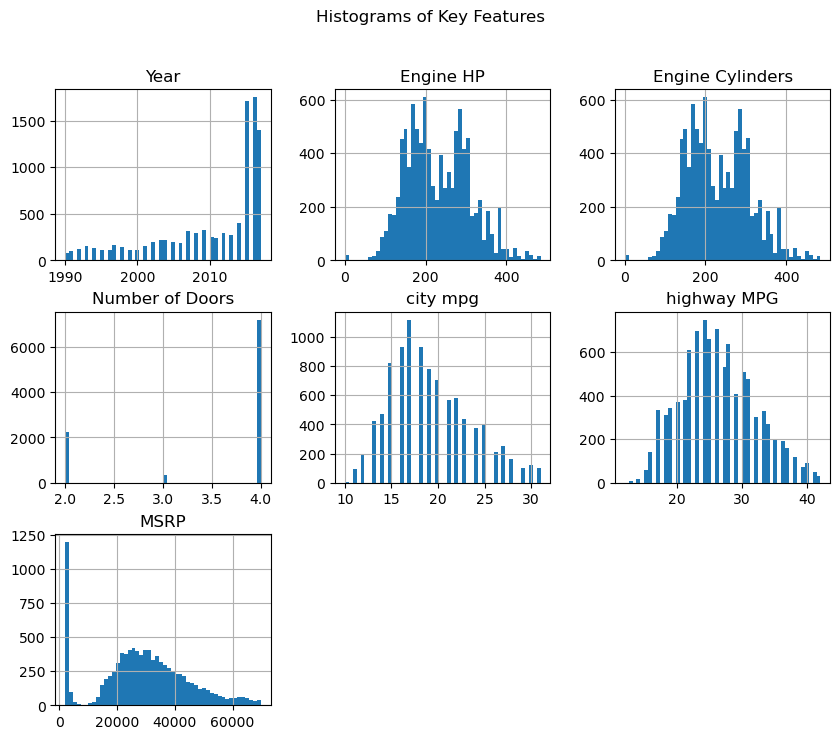

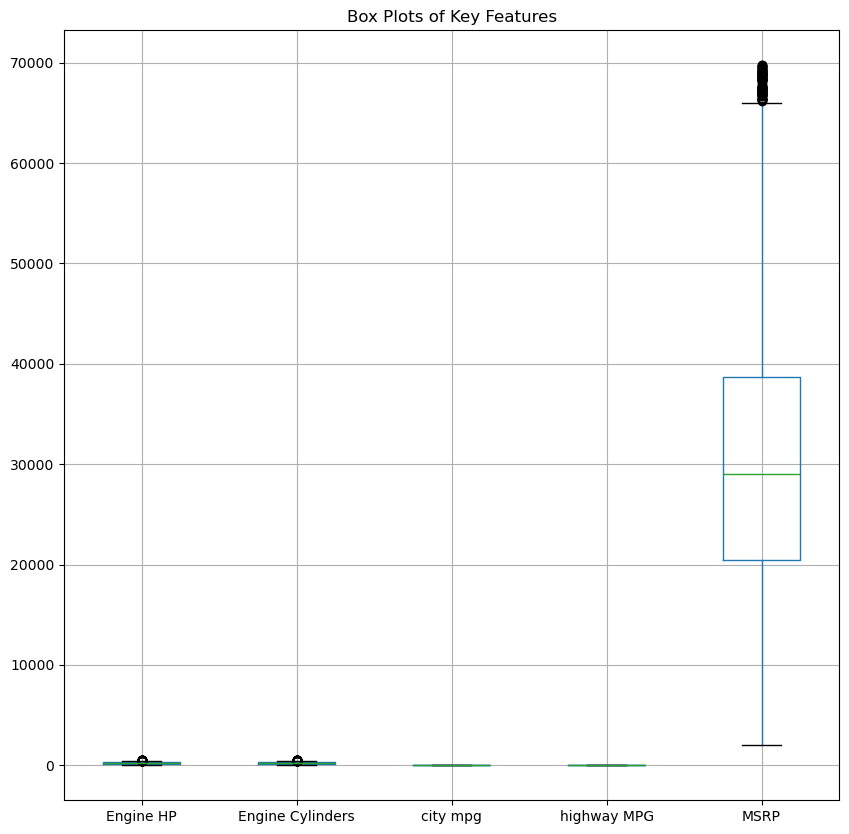

In [70]:
# Summary Statistics
summary_stats = key_features_df.describe()
print(summary_stats)

# Histograms
key_features_df.hist(bins=50, figsize=(10, 8))
plt.suptitle('Histograms of Key Features')
plt.show()

# Box Plots
plt.figure(figsize=(10, 10))
key_features_df[['Engine HP', 'Engine Cylinders', 'city mpg', 'highway MPG', 'MSRP']].boxplot()
plt.title('Box Plots of Key Features')
plt.show()

##### Visualize relationships between features and MSRP

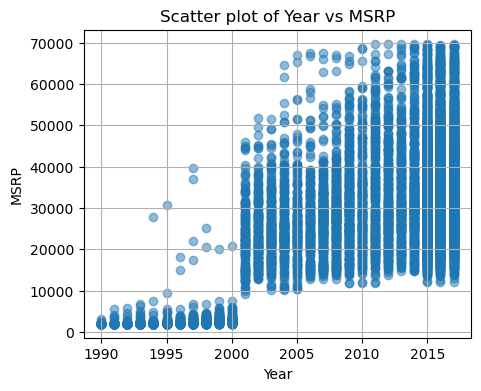

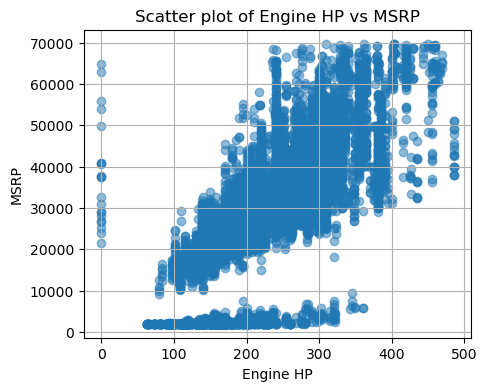

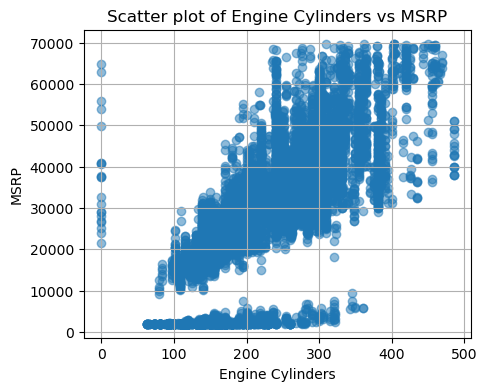

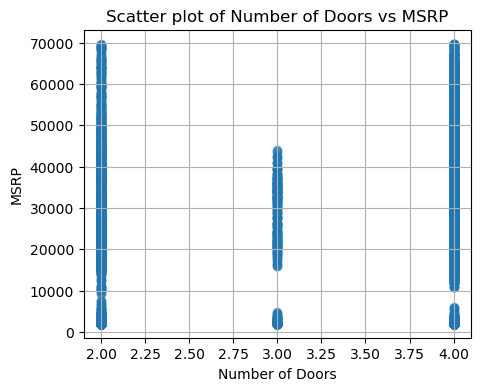

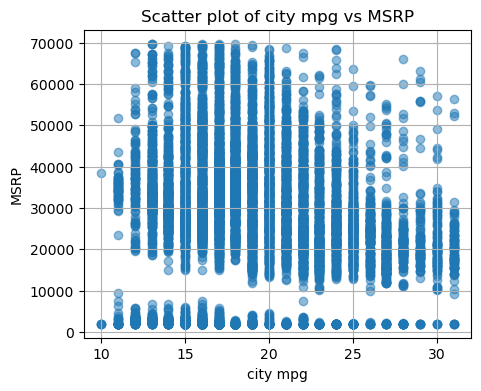

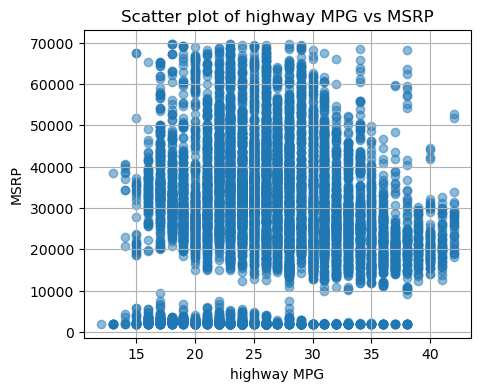

In [71]:
# Create scatter plots for numerical features vs MSRP
for feature in numerical_features:
    if feature!='MSRP':
        plt.figure(figsize=(5, 4))
        plt.scatter(key_features_df[feature], key_features_df['MSRP'], alpha=0.5)
        plt.title(f'Scatter plot of {feature} vs MSRP')
        plt.xlabel(feature)
        plt.ylabel('MSRP')
        plt.grid(True)
        plt.show()



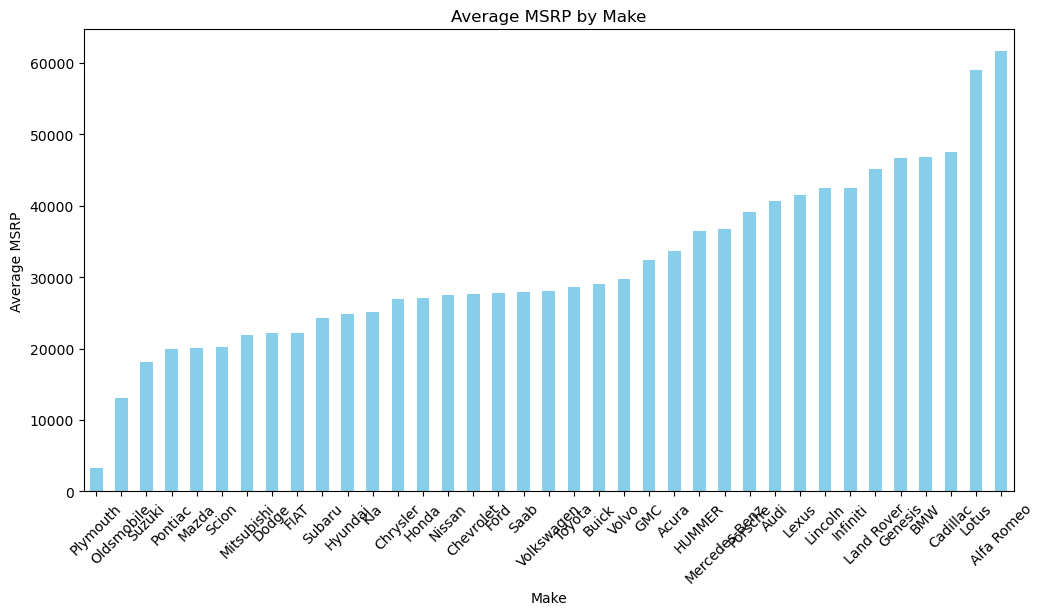

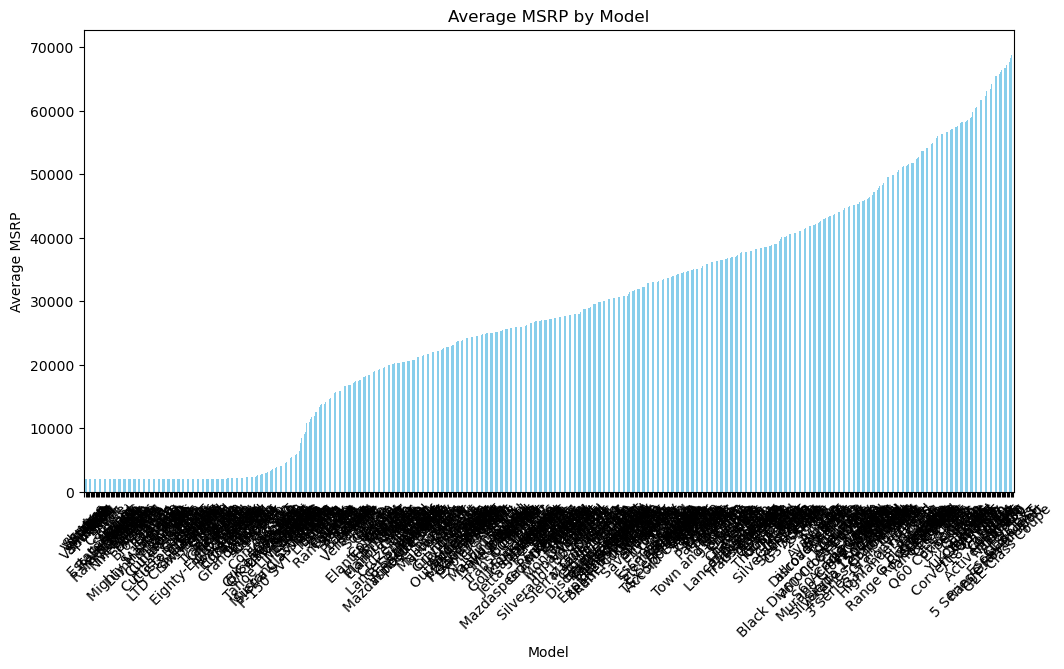

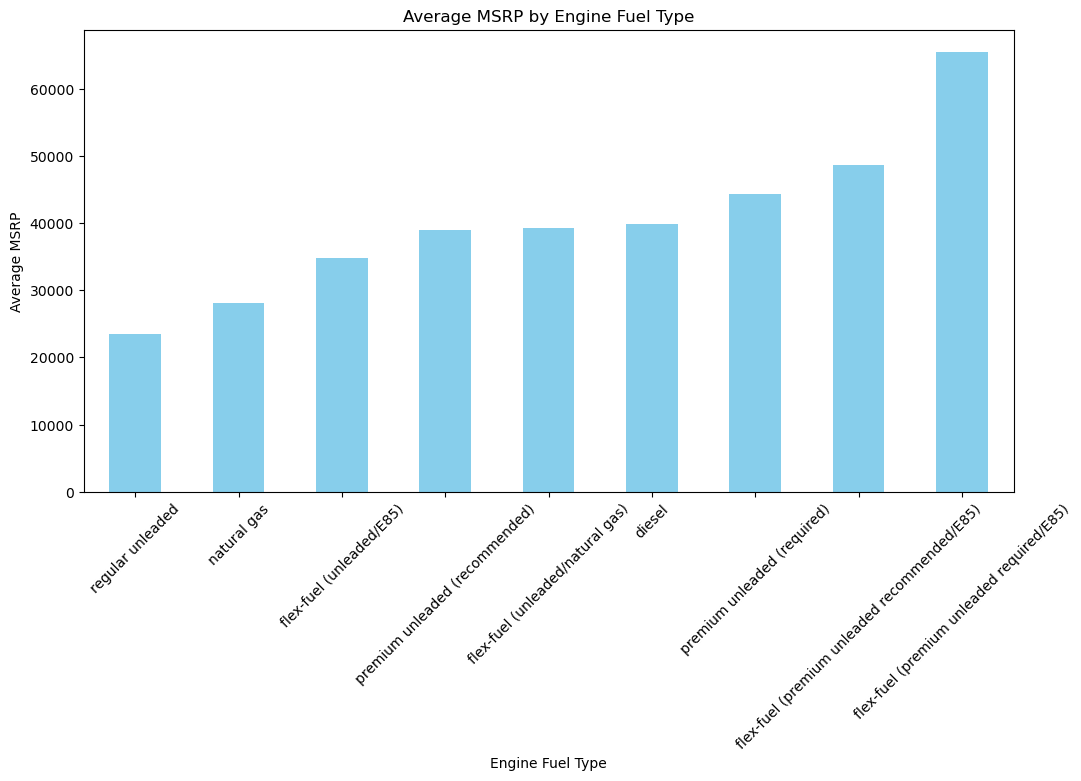

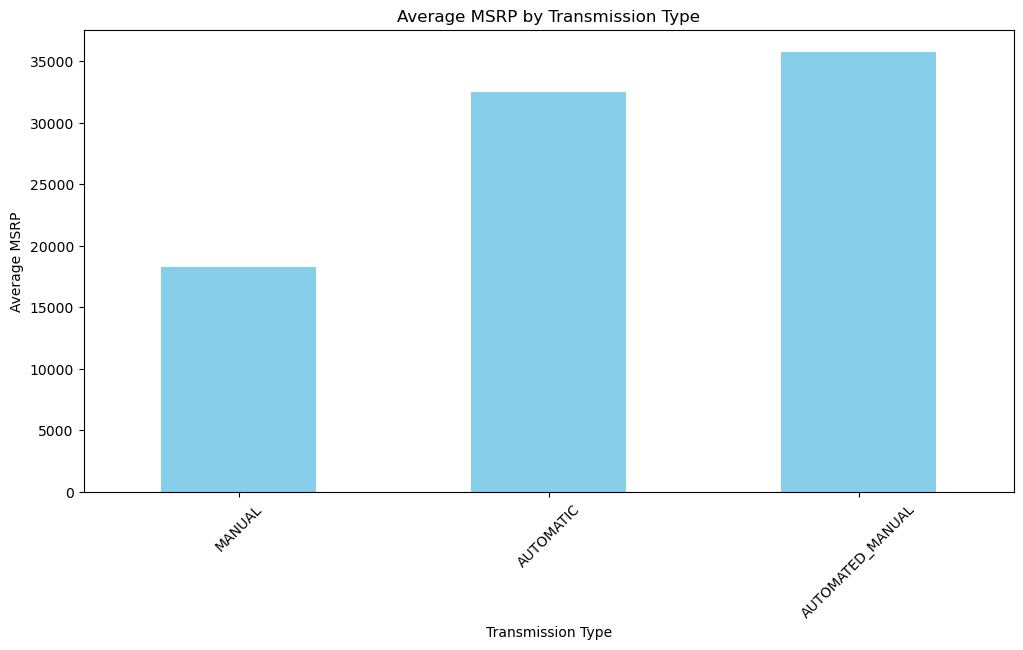

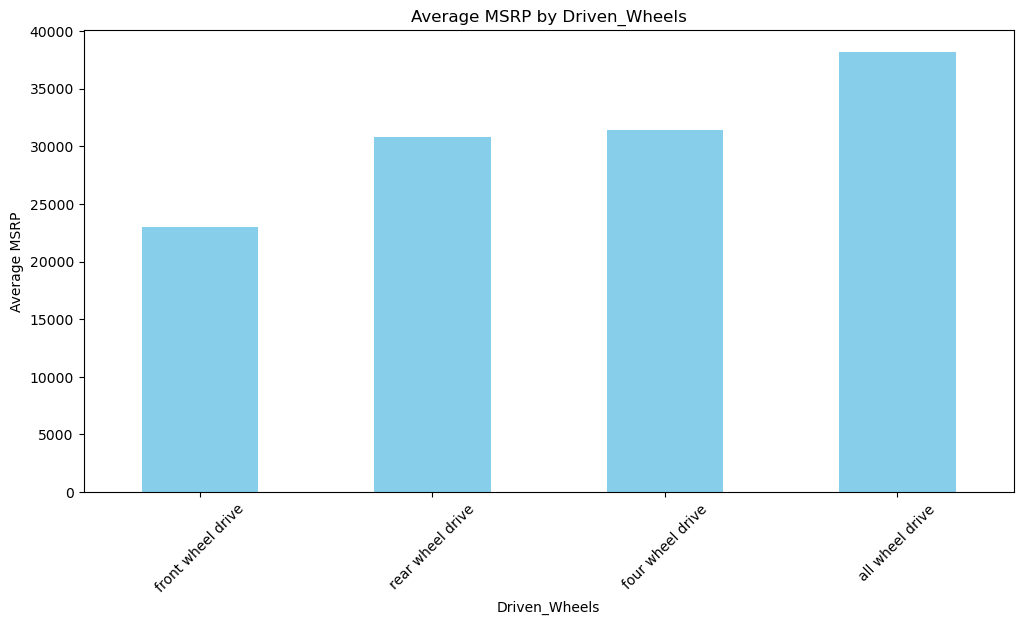

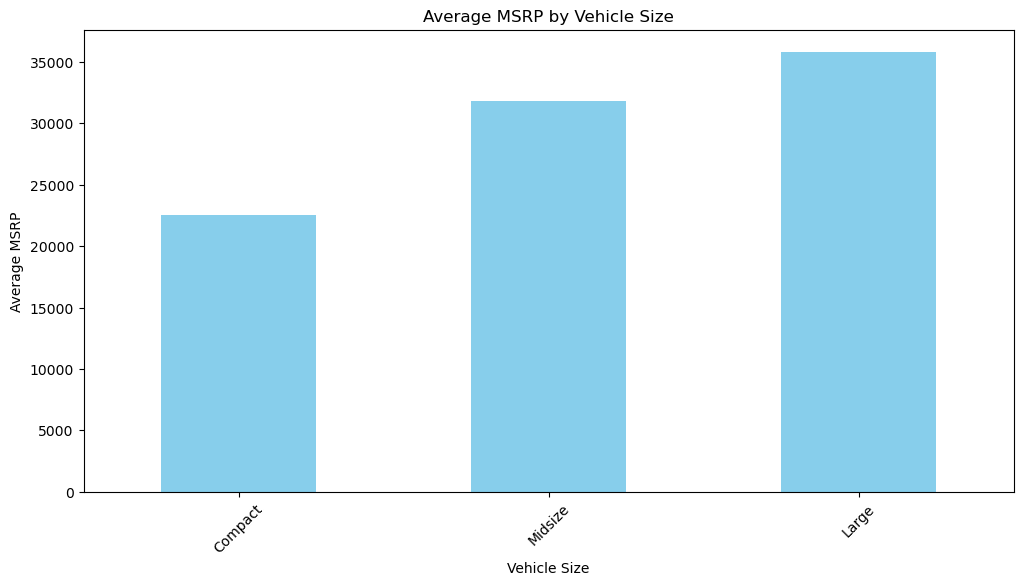

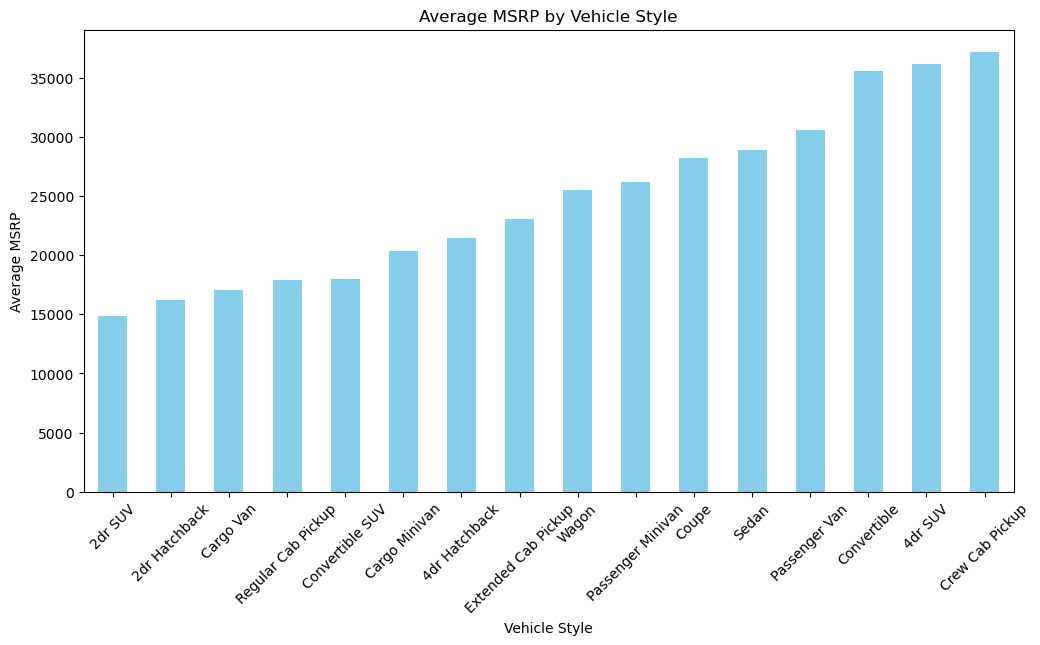

In [72]:
# Function to create bar plots for each categorical feature
def plot_categorical_vs_msrp(df, feature):
    plt.figure(figsize=(12, 6))
    avg_msrp = df.groupby(feature)['MSRP'].mean().sort_values()
    avg_msrp.plot(kind='bar', color='skyblue')
    plt.title(f'Average MSRP by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Average MSRP')
    plt.xticks(rotation=45)
    plt.show()

# Generate bar plots for each categorical feature
for feature in categorical_features:
    plot_categorical_vs_msrp(key_features_df, feature)


#### Relation between price and other numerical variables

In [73]:
figure = px.scatter(key_features_df, x = 'Year', y = 'MSRP', color = 'Engine Cylinders')
figure.show()

In [74]:
figure = px.scatter(key_features_df, x = 'Engine HP', y = 'MSRP', color = 'Engine Cylinders')
figure.show()

**Insights**
* There is a positive relation between hp and price. It can be seen that as the hp increases, the car prices also increases.
* As the hp increases more than 290, most of the cars are likely to have 8 cylinders. 
* Cars having hp less than 180 are more likely to have 4 cylinders.

In [75]:
figure = px.scatter(key_features_df, x = 'highway MPG', y = 'MSRP', color = 'Engine Cylinders')
figure.show()


**Insights**
* The prices of cars with different highway mpg varies. It can be as low as 2000 and as high as 70K.

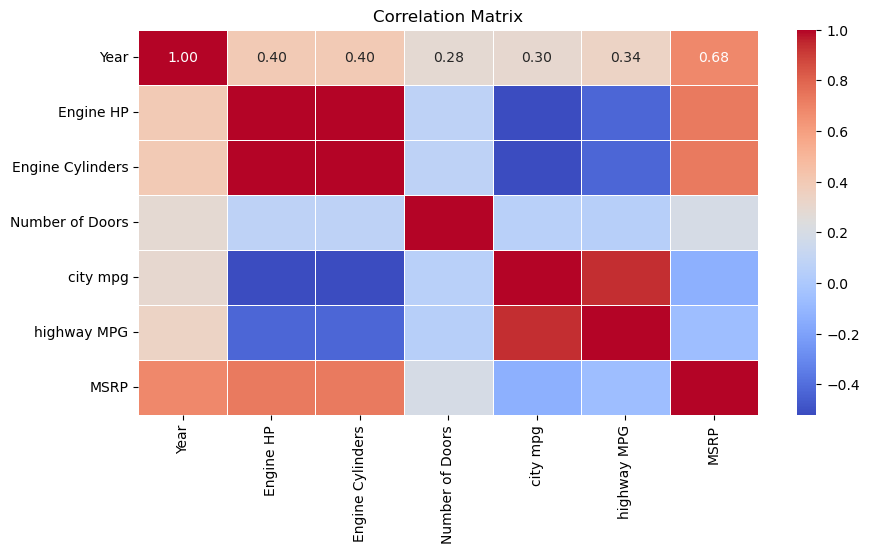

In [76]:
# Calculate the correlation matrix
correlation_matrix = key_features_df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### Analysis of Summary Statistics and Visualizations
- 'MSRP' has a high standard deviation, suggesting significant variability in vehicle prices.

- The distribution of 'City MPG' is right-skewed, indicating more vehicles have lower city mileage.
- 'Engine Cylinders' show a bi-modal distribution, reflecting different types of engine configurations.

- Outliers are present in 'MSRP', indicating some vehicles are priced significantly higher or lower than the majority.
- 'Engine HP' also has notable outliers on the higher end.

- **Engine HP vs. MSRP:** A positive correlation suggests that higher horsepower vehicles tend to have higher MSRPs. This helps justify pricing strategies for high-performance vehicles.
- **City MPG vs. MSRP:** A negative correlation indicates that more fuel-efficient cars tend to be cheaper, which is valuable for targeting budget-conscious consumers.
- **Highway MPG vs. MSRP:** Similar to City MPG, a negative correlation helps identify market segments for fuel-efficient, affordable vehicles.Identifies market segments for fuel-efficient, affordable vehicles.
- **Vehicle Size and MSRP:**
Larger vehicles (e.g., SUVs) tend to have higher MSRP compared to smaller vehicles (e.g., sedans).This reflects the higher value and possibly higher production costs of larger vehicles.
- **Fuel Efficiency and MSRP:**
There seems to be a weak negative relationship between city/highway MPG and MSRP, suggesting that more fuel-efficient cars are not necessarily more expensive.
- **Popular Brands and MSRP:**
Some brands like BMW, Mercedes-Benz, and Audi have higher average MSRP compared to other brands.Indicates a premium pricing strategy associated with these brands

##### Proposed Hypothesis for future

##### Hypothesis 1:
- **Hypothesis:** Vehicles with higher engine horsepower (HP) have higher MSRPs.
- **Relevance:** Understanding this relationship helps manufacturers and dealerships justify higher prices for high-performance vehicles.
- **Value:** This insight can inform marketing strategies and product positioning to attract customers interested in high-performance vehicles.

##### Hypothesis 2:
- **Hypothesis:** Fuel-efficient vehicles (higher City/Highway MPG) have lower MSRPs.
- **Relevance:** This relationship helps manufacturers target budget-conscious consumers with fuel-efficient models.
- **Value:** Marketing campaigns can be tailored to emphasize cost savings and fuel efficiency, attracting a specific customer segment.

##### Hypothesis 3: 
- **Hypothesis:** There is no significant difference in MSRP between cars with different types of transmissions (e.g., automatic vs manual).
- **Relevance:**  Understanding the impact of transmission type on pricing can help in product development and marketing strategies.

##### Hypothesis 4:
- **Hypothesis:** Popular luxury brands (e.g., BMW, Mercedes-Benz, Audi) have higher MSRPs compared to other brands.
- **Relevance:** Identifying this trend helps in understanding brand value and consumer willingness to pay a premium.
- **Value:** Brands can leverage this insight to reinforce their luxury status and justify higher prices through branding and quality assurances.




##### Business Insights - 
To optimize pricing strategies, manufacturers and dealers should emphasize high horsepower and larger vehicle sizes, which significantly impact MSRP. On the other hand, while marketing efforts can highlight features like the number of doors or market categories, these should not be the primary factors in pricing decisions. By focusing on the most influential features, stakeholders can better predict market trends and make informed pricing decisions.


### References:

1. https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed <a id='3'></a>
2. https://plotly.com/python/box-plots/
3. https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
4. https://app.diagrams.net/
5. https://www.kaggle.com/discussions/general/414787